In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

num_iterations = 3

### Combining iterations

combining iterations to simplify analysis. As you can see in Figure X, most of the difference between iterations is the distribution of the actual values (which is variation that we want to average out)- the slope of the scatter plot doesn't change much.

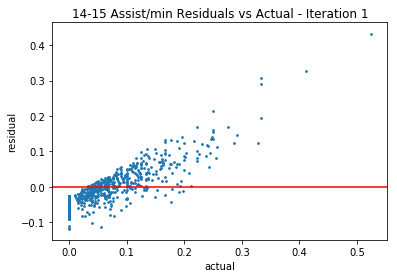

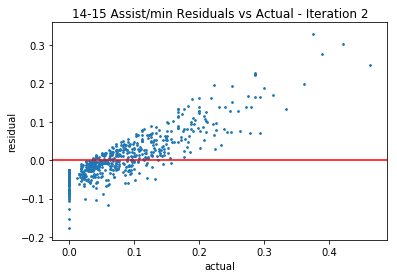

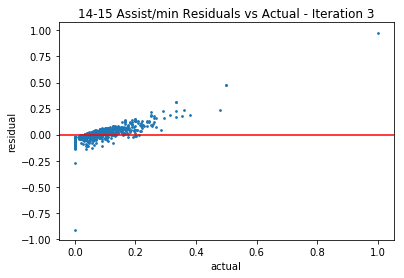

In [4]:
for i in range(num_iterations):
    file_path = 'results/ast_per_min2015_{}.csv'.format(i)
    df = pd.read_csv(file_path)
    
    actual = df.as_matrix(columns=['actual_mean_10'])

    
    pred = df.as_matrix(columns=['linreg_mean_10'])
    
    resid = actual - pred
    
    plt.scatter(actual, resid, s=3)

    plt.axhline(y=0, c='r')
    
    plt.title('14-15 Assist/min Residuals vs Actual - Iteration {}'.format(i+1))
    plt.xlabel('actual')
    plt.ylabel('residual')

    plt.show()

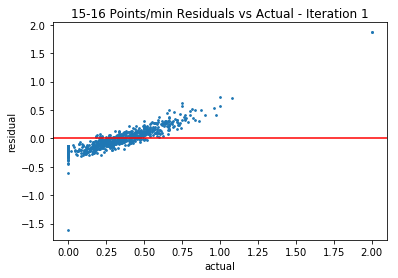

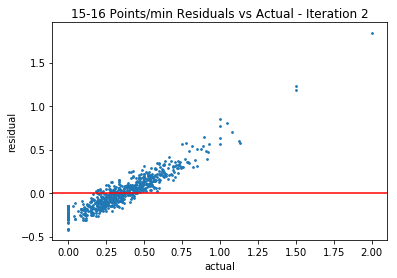

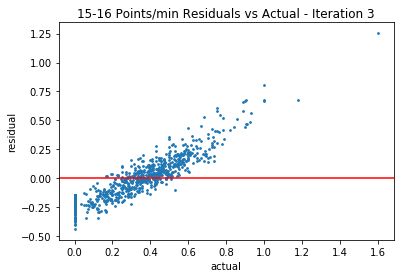

In [5]:
for i in range(num_iterations):
    file_path = 'results/pts_per_min2016_{}.csv'.format(i)
    df = pd.read_csv(file_path)
    
    actual = df.as_matrix(columns=['actual_mean_10'])

    
    pred = df.as_matrix(columns=['linreg_mean_10'])
    
    resid = actual - pred
    
    plt.scatter(actual, resid, s=3)

    plt.axhline(y=0, c='r')
    
    plt.title('15-16 Points/min Residuals vs Actual - Iteration {}'.format(i+1))
    
    plt.xlabel('actual')
    plt.ylabel('residual')

    plt.show()

### Combine (for below analysis)

In [11]:
years = [2015, 2016, 2017]
stats = ['pts_per_min', 'trb_per_min', 'ast_per_min', 'stl_per_min', 'blk_per_min']

stat_years = []
for year in years:
    for stat in stats:
        stat_years.append('{}{}'.format(stat, year))

num_iterations = 3
        
import fitting

actual_treatments = []
model_treatments = []
for model in ['linreg', 'rf']:
    for treatment in fitting.treatments:
        model_treatments.append('{}_{}'.format(model, treatment))
        actual_treatments.append('actual_{}'.format(treatment))

## Table of MAE for each year/stat (avged across iterations)

In [12]:
mae_df = pd.DataFrame(index=stat_years, columns=model_treatments)

for index, row in mae_df.iterrows():
    values = []
    for mt_i in range(len(model_treatments)):
        actuals = []
        preds = []
        for i in range(num_iterations):
            file_path = 'results/{}_{}.csv'.format(index, i)
            df = pd.read_csv(file_path)
            
            actual = df.as_matrix(columns=['actual_{}'.format(treatment)])
            actuals.append(actual)

            pred = df.as_matrix(columns=['{}_{}'.format(model, treatment)])
            preds.append(pred)
                
        actuals_arr = np.vstack(actuals)
        preds_arr = np.vstack(preds)
            
        value = mean_absolute_error(actuals_arr, preds_arr)
        values.append(value)
        
    mae_df.loc[index] = values

pts_per_min2015
trb_per_min2015
ast_per_min2015
stl_per_min2015
blk_per_min2015
pts_per_min2016
trb_per_min2016
ast_per_min2016
stl_per_min2016
blk_per_min2016
pts_per_min2017
trb_per_min2017
ast_per_min2017
stl_per_min2017
blk_per_min2017


In [15]:
mae_df

,linreg_null,linreg_median_5,linreg_median_10,linreg_mean_5,linreg_mean_10,rf_null,rf_median_5,rf_median_10,rf_mean_5,rf_mean_10
pts_per_min2015,0.158195,0.158195,0.158195,0.158195,0.158195,0.158195,0.158195,0.158195,0.158195,0.158195
trb_per_min2015,0.078812,0.078812,0.078812,0.078812,0.078812,0.078812,0.078812,0.078812,0.078812,0.078812
ast_per_min2015,0.0475969,0.0475969,0.0475969,0.0475969,0.0475969,0.0475969,0.0475969,0.0475969,0.0475969,0.0475969
stl_per_min2015,0.032943,0.032943,0.032943,0.032943,0.032943,0.032943,0.032943,0.032943,0.032943,0.032943
blk_per_min2015,0.0162856,0.0162856,0.0162856,0.0162856,0.0162856,0.0162856,0.0162856,0.0162856,0.0162856,0.0162856
pts_per_min2016,0.156317,0.156317,0.156317,0.156317,0.156317,0.156317,0.156317,0.156317,0.156317,0.156317
trb_per_min2016,0.0760568,0.0760568,0.0760568,0.0760568,0.0760568,0.0760568,0.0760568,0.0760568,0.0760568,0.0760568
ast_per_min2016,0.045184,0.045184,0.045184,0.045184,0.045184,0.045184,0.045184,0.045184,0.045184,0.045184
stl_per_min2016,0.0358449,0.0358449,0.0358449,0.0358449,0.0358449,0.0358449,0.0358449,0.0358449,0.0358449,0.0358449
blk_per_min2016,0.0154271,0.0154271,0.0154271,0.0154271,0.0154271,0.0154271,0.0154271,0.0154271,0.0154271,0.0154271


## Table of RMSE for each year/stat (avged across iterations)

In [ ]:
mae_df = pd.DataFrame(index=stat_years, columns=model_treatments)

for index, row in mae_df.iterrows():
    values = []
    for mt_i in range(len(model_treatments)):
        actuals = []
        preds = []
        for i in range(num_iterations):
            file_path = 'results/{}_{}.csv'.format(index, i)
            df = pd.read_csv(file_path)
            
            actual = df.as_matrix(columns=['actual_{}'.format(treatment)])
            actuals.append(actual)

            pred = df.as_matrix(columns=['{}_{}'.format(model, treatment)])
            preds.append(pred)
                
        actuals_arr = np.vstack(actuals)
        preds_arr = np.vstack(preds)
            
        value = mean_absolute_error(actuals_arr, preds_arr)
        values.append(value)
        
    mae_df.loc[index] = values

In [ ]:
rmse_df

## Table of scaled MAE for each year/stat (avged across iterations)

## Table of scaled RMSE for each year/stat (avged across iterations)

## Bar plot of scaled MAE for each stat (avged across years/iterations)

## Bar plot of scaled MAE for each stat (avged across years/iterations)